In [1]:
from numpy import sqrt, pi, exp, arcsin, linspace, loadtxt, zeros, diag
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.special import hyp2f1

In [2]:
def show_params(D1, D2, K):
    table_data = {
        'D1'   : D1,
        'D2'   : D2,
        'D1/D2': D1/D2,
        'K'    : K
    }
    props_table = DataFrame(
        table_data,
        index=[0],
        columns=['D1', 'D2', 'D1/D2', 'K']
    )
    return props_table.style

def plot(x0, D_obs, *args):
    fig  = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.plot(x0, D_obs, 'o', linewidth=3, color='#90CAF9', label='D (observed)')
    axes.plot(x0, SHIM(x0, args[0], args[1], args[2]), linewidth=2, color='#BA68C8', label='D (SHIM)')
    axes.plot(x0, SHIM(x0, args[3], args[4], args[5]), '--', linewidth=1, color='green', label='suppl. calc')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.xaxis.set_ticks_position('bottom')
    axes.yaxis.set_ticks_position('left')
    axes.set_xlabel('Concentration')
    axes.set_ylabel('D')
    axes.legend()
    axes.grid(alpha=.5)
    plt.show()

def SHIM(x0, D1, D2, K):
    x1 = (1+2*K*x0-(1+4*K*x0)**.5)/(2*(K**2)*x0)
    return D1*x1/x0*hyp2f1(2, D2/(D1-D2), D1/(D1-D2), K*x1)

2.1376851544 1.71202925778 6.32898008853 1.24862653176


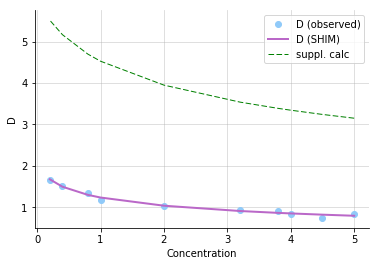

In [3]:
aik_data = loadtxt('data_files\\aik.dat')
x0 = aik_data[:,0]
D_obs = aik_data[:,1] * 1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[1.4, 1.2, .4],
        bounds=([1,0,.3], [10,10,10]))
print(D1, D2, K, D1/D2)

plot(x0, D_obs, D1, D2, K, 6.046585245, 4.36710237, 1.036705676)
show_params(D1, D2, K)

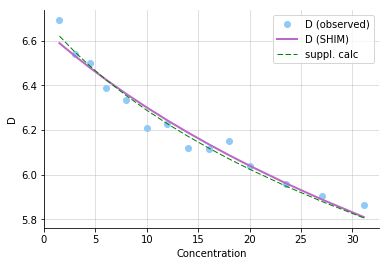

In [4]:
caf_data = loadtxt('data_files\\caf.dat')
x0 = caf_data[:,0]
D_obs = caf_data[:,1]*1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[7, 5.5, 1.15e-2],
        loss='soft_l1',
        bounds=([6,5,1e-2], [8,6,1.3e-2]))

plot(x0, D_obs, D1, D2, K, 6.700092743, 5.845994206, .033101402)
show_params(D1, D2, K)

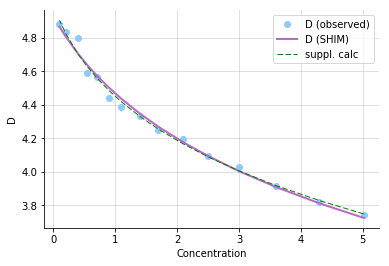

In [5]:
eb_data = loadtxt('data_files\\eb.dat')
x0 = eb_data[:,0]
D_obs = eb_data[:,1]*1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[4.8, 4, .3],
        loss='soft_l1',
        bounds=([4,3,.2], [6,5,.4]))

plot(x0, D_obs, D1, D2, K, 5.000985502, 4.5332945, 1.161351576)
show_params(D1, D2, K)

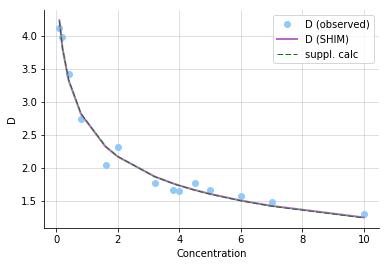

In [6]:
nb_data = loadtxt('data_files\\nb.dat')
x0 = nb_data[:,0]
D_obs = nb_data[:,1]*1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[4.7, 3.5, 6],
        loss='soft_l1',
        bounds=([4,3,5.5], [7, 5, 6]))

plot(x0, D_obs, D1, D2, K, 5.006336409, 3.493836991, 4.099913202)
show_params(D1, D2, K)

In [7]:
pf_data = loadtxt('data_files\\pf.dat')
x0 = pf_data[:,0]
D_obs = pf_data[:,1]*1e10
print(x0, D_obs)
(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[2, 2, .5],
        loss='soft_l1',
        bounds=([1,1,.1], [15,15,1]))

plot(x0, D_obs, D1, D2, K)
show_params(D1, D2, K)

[ 5.2   4.5   3.8   3.2   2.6   2.1   1.65  1.35  1.1   0.9   0.7   0.5
  0.3   0.15] [ 3.1205   3.2855   3.3605   3.53125  3.704    3.8445   4.0855   4.216
  4.374    4.528    4.7935   4.99     5.392    5.62125]


C:\Soft\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: divide by zero encountered in double_scalars


ValueError: Residuals are not finite in the initial point.